# Линейная алгебра в контексте линейных методов. Часть 3

## Практика: собственные векторы и числа

In [1]:
import numpy as np

### Пример 1
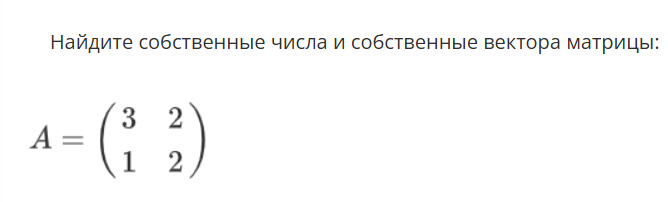

In [3]:
#Создаем матрицу А
A = np.array([
    [3,1],
    [2,2]
]).T
#Вычисляем собственные числа и собственные векторы
eig_values, eig_vectors = np.linalg.eig(A)
print('Собственные числа: \n', eig_values)
print('Собственные векторы: \n', eig_vectors)

Собственные числа: 
 [4. 1.]
Собственные векторы: 
 [[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]


### Пример 2
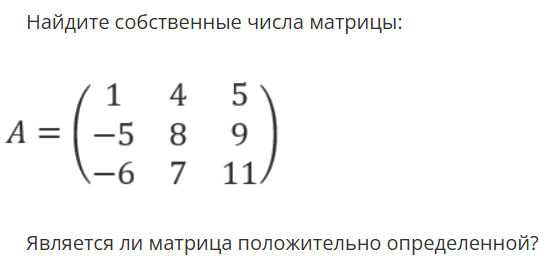

In [8]:
#Создаем матрицу А
A = np.array([
    [1, -5, -6],
    [4, 8, 7],
    [5, 9, 11]
]).T
#Вычисляем собственные числа и собственные векторы
eig_values, eig_vectors = np.linalg.eig(A)
print('Собственные числа: \n', eig_values.round(3))
print('Собственные векторы: \n', eig_vectors.round(3))

Собственные числа: 
 [13.594  5.032  1.374]
Собственные векторы: 
 [[ 0.451  0.837  0.103]
 [ 0.623  0.446 -0.773]
 [ 0.638  0.318  0.626]]


### Пример 3
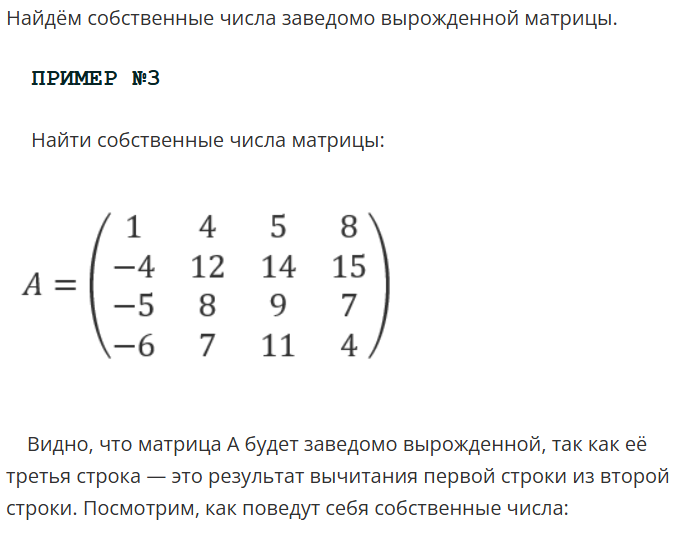


In [11]:
#Создаем матрицу А
A = np.array([
    [1, -4, -5, -6],
    [4, 12, 8, 7],
    [5, 14, 9, 11],
    [8, 15, 7, 4]
]).T
#Вычисляем собственные числа и собственные векторы
eig_values, eig_vectors = np.linalg.eig(A)
print('Собственные числа: \n', eig_values.round(3))
print('Собственные векторы: \n', eig_vectors.round(3))

Собственные числа: 
 [25.469  1.531  0.    -1.   ]
Собственные векторы: 
 [[-0.332 -0.674  0.548 -0.531]
 [-0.756 -0.677  0.72  -0.649]
 [-0.424 -0.003 -0.005 -0.118]
 [-0.371  0.296 -0.426  0.531]]


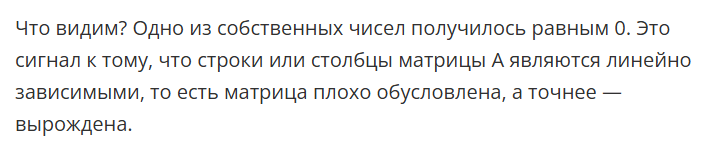

### Пример 4
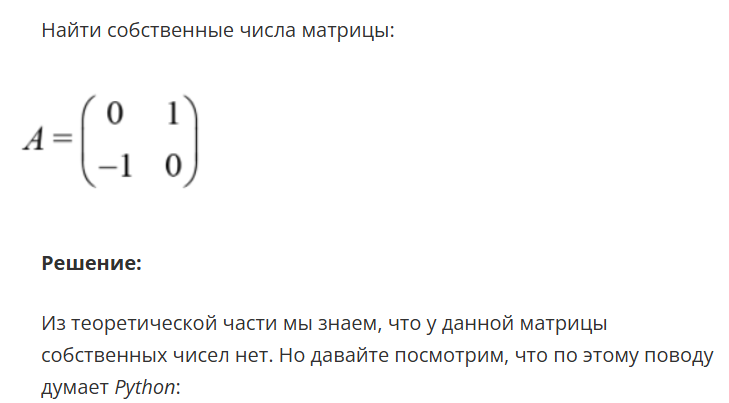

In [12]:
#Создаем матрицу А
A = np.array([
    [0,1],
    [-1,0]
]).T
#Вычисляем собственные числа и собственные векторы
eig_values, eig_vectors = np.linalg.eig(A)
print('Собственные числа: \n', eig_values)
print('Собственные векторы: \n', eig_vectors)

Собственные числа: 
 [0.+1.j 0.-1.j]
Собственные векторы: 
 [[0.70710678+0.j         0.70710678-0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]


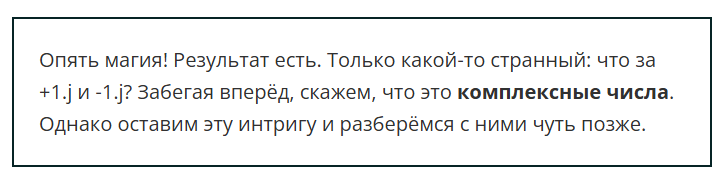

### Пример 5
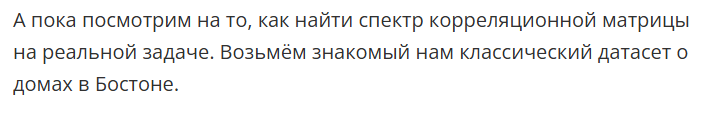

In [14]:
from sklearn import datasets
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore',
                      category=FutureWarning)

#Загружаем датасет
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 
                'RM', 'AGE', 'DIS', 'RAD', 'TAX', 
                'PTRATIO', 'B', 'LSTAT', 'PRICE']
boston_data = pd.read_csv('data/housing.csv',
                          header=None, delimiter=r'\s+', names=column_names)
display(boston_data.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Составим матрицу наблюдений, в которую войдут все исходыне факторы и вектор целевой переменной

In [15]:
A = boston_data.drop('PRICE', axis=1)
y = boston_data[['PRICE']]

Составим корреляционную матрицу для исходных факторов

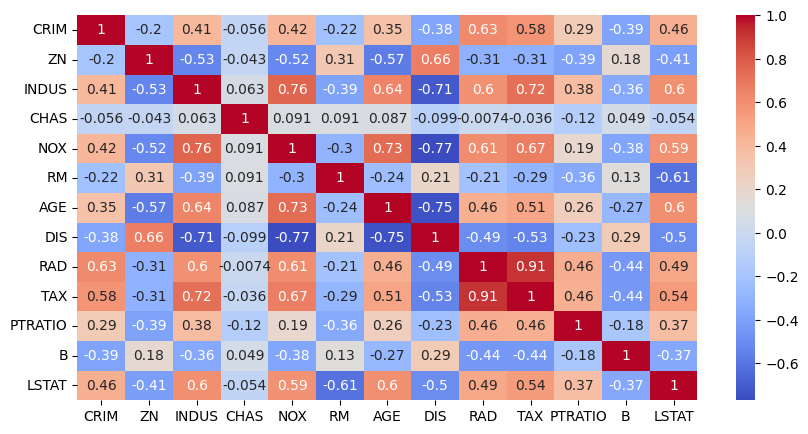

In [20]:
C = A.corr()
fig = plt.figure(figsize=(10,5))
sns.heatmap(C, annot=True, cmap='coolwarm');

Найдем собственные числа полученной корреляционной матрицы

In [22]:
#Выделяем собственные числа и собственные векторы
eig_values, eig_vectors = np.linalg.eig(C)
print('Собственные числа: \n', eig_values)
#print('Собственные векторы: \n', eig_vectors)

Собственные числа: 
 [6.12684883 1.43327512 1.24261667 0.85757511 0.83481594 0.65740718
 0.53535609 0.39609731 0.06350926 0.27694333 0.16930298 0.18601437
 0.22023782]


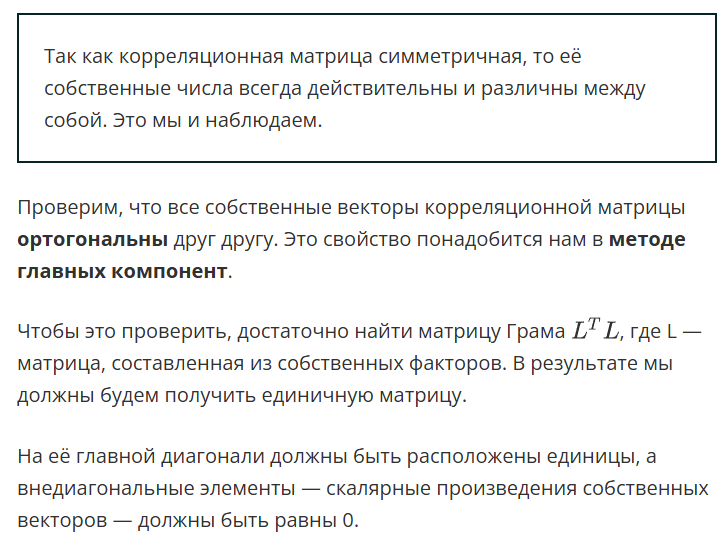

In [23]:
#Считаем матрицу Грамма L^T*L для проверки всех
#собственных веторов на ортогональность

print(np.round(eig_vectors.T@eig_vectors, 2))

[[ 1. -0.  0.  0.  0.  0. -0. -0. -0.  0.  0.  0.  0.]
 [-0.  1. -0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0.]
 [ 0. -0.  1. -0.  0.  0. -0.  0. -0.  0.  0.  0. -0.]
 [ 0.  0. -0.  1.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
 [ 0.  0.  0.  0.  1. -0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -0.  1.  0.  0. -0. -0.  0.  0.  0.]
 [-0. -0. -0.  0.  0.  0.  1. -0. -0.  0. -0.  0.  0.]
 [-0. -0.  0.  0.  0.  0. -0.  1.  0. -0.  0. -0. -0.]
 [-0. -0. -0.  0.  0. -0. -0.  0.  1. -0. -0. -0.  0.]
 [ 0. -0.  0. -0.  0. -0.  0. -0. -0.  1. -0.  0. -0.]
 [ 0.  0.  0.  0.  0.  0. -0.  0. -0. -0.  1. -0. -0.]
 [ 0.  0.  0. -0.  0.  0.  0. -0. -0.  0. -0.  1. -0.]
 [ 0.  0. -0.  0.  0.  0.  0. -0.  0. -0. -0. -0.  1.]]


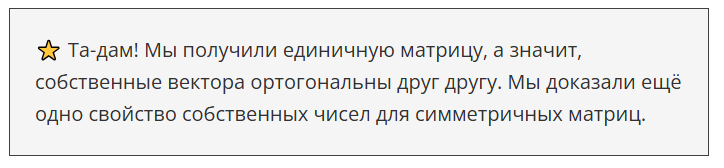

### Задание 4.1
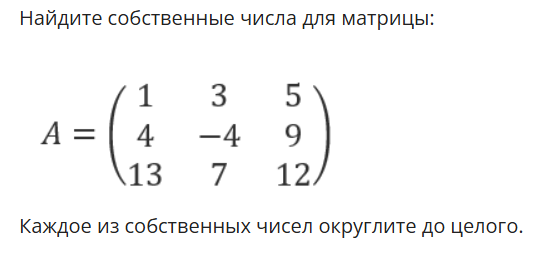

In [24]:
#Создаем матрицу А
A = np.array([
    [1, 4, 13],
    [3, -4, 7],
    [5, 9, 12]
]).T
#Вычисляем собственные числа и собственные векторы
eig_values, eig_vectors = np.linalg.eig(A)
print('Собственные числа: \n', eig_values.round())

Собственные числа: 
 [20. -4. -7.]
Собственные векторы: 
 [[-0. -1.  0.]
 [-0.  1. -1.]
 [-1.  0.  0.]]


### Задание 4.2
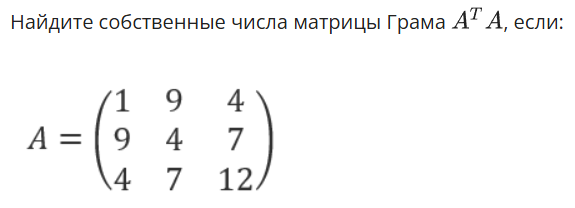

In [26]:
#Создаем матрицу А
A = np.array([
    [1, 9, 4],
    [9, 4, 7],
    [4, 7, 12]
]).T


#Вычисляем матрицу Грамма 
G = A.T@A
#Вычисляем собственные числа и собственные векторы
eig_values, eig_vectors = np.linalg.eig(G)
print('Собственные числа: \n', eig_values.round())

Собственные числа: 
 [391.  46.  16.]


## Метод главных компонент

### Задание 6.5-3

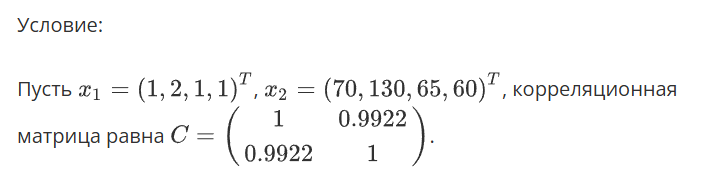

In [78]:
x1 = np.array([1,2,1,1]).T
x2 = np.array([70, 1130, 65, 60]).T
C = np.array([[1, 0.9922],
             [0.9922, 1]])

eig_values, eig_vectors = np.linalg.eig(C)
print('Собственные числа: \n', eig_values)
print('Собственные векторы: \n', eig_vectors)

Собственные числа: 
 [1.9922 0.0078]
Собственные векторы: 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [79]:
x1 = np.array([1, 2, 1, 1]).T
x2 = np.array([70, 130, 65, 60]).T

C = np.array([[1, 0.9922], [0.9922, 1]])

eig_values, eig_vectors = np.linalg.eig(C)

x1_norm = (x1 - x1.mean()) / np.linalg.norm(x1)
x2_norm = (x2 - x2.mean()) / np.linalg.norm(x2)

x_new = x1_norm * eig_vectors[0][0] + x2_norm * eig_vectors[1][0]

x_new_norm = (x_new - x_new.mean()) / np.linalg.norm(x_new)

print(np.round(x_new_norm, 2))

[-0.24  0.86 -0.29 -0.33]


## Сингулярное разложение

In [80]:
#В библиотеке numpy сингулярное разложение реализовано в функции np.linalg.svd()

# составляем матрицу А 
A = np.array([
    [2, 5, -4],
    [6, 3, 0],
]).T
# применяем сингулярное разложение
np.linalg.svd(A)

(array([[-0.66666667,  0.66666667, -0.33333333],
        [-0.66666667, -0.33333333,  0.66666667],
        [ 0.33333333,  0.66666667,  0.66666667]]),
 array([8.48528137, 4.24264069]),
 array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]))